In [1]:
import numpy as np
import pandas as pd

A 3D point cloud of a [mammoth at the Smithsonian](https://3d.si.edu/object/3d/mammuthus-primigenius-blumbach:341c96cd-f967-4540-8ed1-d3fc56d31f12), used in [Understanding UMAP](https://pair-code.github.io/understanding-umap/) ([github repo](https://github.com/PAIR-code/understanding-umap)), based on work originally done by [Max Noichl](https://github.com/MNoichl/UMAP-examples-mammoth-).

In [2]:
data = pd.read_json(
    "https://raw.githubusercontent.com/PAIR-code/understanding-umap/1ff6f3a1aa3c036b7f4153862c5d95186dddb2f4/raw_data/mammoth_3d_50k.json",
    orient="records",
)
data.columns = ["x", "y", "z"]
data

,x,y,z
0,53.441,329.536,108.807
1,80.453,336.454,104.619
2,72.278,506.154,80.135
3,77.343,290.973,120.397
4,91.655,216.630,87.732
...,...,...,...
49995,15.003,474.172,50.212
49996,65.712,253.678,118.557
49997,100.727,237.717,76.116
49998,71.057,399.677,130.728


As there is no natural categorical target for this dataset, we'll follow Max Noichl's lead in
clustering the 3D skeleton. This makes it easier to see which part of the mammoth is being 
distorted in the embedding process.

It may take a few minutes to do the clustering.

In [3]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=12).fit(data)
clustering.labels_

array([ 1,  1,  4, ...,  7, 11,  6])

In [4]:
target_df = pd.DataFrame(clustering.labels_, columns=["cluster"])
target_df["cluster"] = target_df["cluster"].astype("category")

In [5]:
from drnb.io.pipeline import create_default_pipeline

data_result = create_default_pipeline(check_for_duplicates=True).run(
    "mammoth",
    data=data,
    target=target_df,
    tags=["lowdim", "synthetic"],
    url="https://github.com/PAIR-code/understanding-umap",
    verbose=True,
)

[00:07:17] INFO     Requesting one extra neighbor to account for self-neighbor       ]8;id=38304;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=18134;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#623\623]8;;\

           INFO     Initial data shape: (50000, 3)                                    ]8;id=122593;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=230247;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#83\83]8;;\

           INFO     Keeping all columns                                             ]8;id=265049;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=533524;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Data shape after filtering columns: (50000, 3)                   ]8;id=783213;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=876614;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#164\164]8;;\

           INFO     Removing rows with NAs                                           ]8;id=360695;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=497651;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#145\145]8;;\

           INFO     Data shape after filtering NAs: (50000, 3)                       ]8;id=735554;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=549758;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#156\156]8;;\

           INFO     Checked for duplicates: found 0                                  ]8;id=544941;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=124658;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#172\172]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}     ]8;id=243654;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=16063;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#187\187]8;;\

           INFO     Writing data for mammoth                                         ]8;id=102679;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=242730;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Processing target with initial shape (50000, 1)                  ]8;id=633336;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=603911;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#243\243]8;;\

           INFO     Keeping all columns                                             ]8;id=565427;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=845715;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Writing target for mammoth                                       ]8;id=127996;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=872393;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Calculating nearest neighbors                                    ]8;id=841794;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=910215;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#317\317]8;;\

           INFO     Loading faiss with AVX2 support.                                   ]8;id=525750;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=541513;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#110\110]8;;\

[00:07:18] INFO     Successfully loaded faiss with AVX2 support.                       ]8;id=41115;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=953239;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#112\112]8;;\

           INFO     Using 'faiss' to find nearest neighbors                           ]8;id=241401;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=23101;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#90\90]8;;\

           INFO     Finding 151 neighbors using faiss with euclidean metric and      ]8;id=231952;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=260723;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#103\103]8;;\
                    params: {}                                                                      

[00:07:20] INFO     Writing numpy format to                                          ]8;id=53991;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=732637;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mammoth.16.euclidean.exact.faiss.idx.npy                                     

[00:07:22] INFO     Writing csv format to                                            ]8;id=71034;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=625184;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mammoth.16.euclidean.exact.faiss.idx.csv                                     

[00:07:23] INFO     Writing numpy format to                                          ]8;id=730342;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=957093;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mammoth.16.euclidean.exact.faiss.dist.npy                                    

[00:07:24] INFO     Writing csv format to                                            ]8;id=629043;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=705091;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mammoth.16.euclidean.exact.faiss.dist.csv                                    

[00:07:26] INFO     Writing numpy format to                                          ]8;id=453245;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=887305;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mammoth.51.euclidean.exact.faiss.idx.npy                                     

[00:07:32] INFO     Writing csv format to                                            ]8;id=954088;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=982654;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mammoth.51.euclidean.exact.faiss.idx.csv                                     

[00:07:35] INFO     Writing numpy format to                                          ]8;id=857154;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=763753;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mammoth.51.euclidean.exact.faiss.dist.npy                                    

[00:07:38] INFO     Writing csv format to                                            ]8;id=808224;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=870489;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mammoth.51.euclidean.exact.faiss.dist.csv                                    

[00:07:42] INFO     Writing numpy format to                                          ]8;id=132981;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=716970;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mammoth.151.euclidean.exact.faiss.idx.npy                                    

[00:07:43] INFO     Writing csv format to                                            ]8;id=379937;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=85216;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mammoth.151.euclidean.exact.faiss.idx.csv                                    

[00:07:51] INFO     Writing numpy format to                                          ]8;id=211474;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=10507;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mammoth.151.euclidean.exact.faiss.dist.npy                                   

           INFO     Writing csv format to                                            ]8;id=229370;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=175197;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mammoth.151.euclidean.exact.faiss.dist.csv                                   

[00:08:01] INFO     Calculating triplets                                             ]8;id=256167;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=538049;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#331\331]8;;\

[00:08:02] INFO     Writing csv format to triplets/mammoth.5.1337.idx.csv            ]8;id=876701;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=211786;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\

[00:08:03] INFO     Writing csv format to triplets/mammoth.5.1337.euclidean.csv      ]8;id=655118;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=961604;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\

[00:08:04] INFO     Writing numpy format to triplets/mammoth.5.1337.idx.npy          ]8;id=402738;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=344541;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\

           INFO     Writing numpy format to triplets/mammoth.5.1337.euclidean.npy    ]8;id=800140;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=823478;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\

           INFO     Writing pipeline result for mammoth                              ]8;id=50587;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=242957;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#134\134]8;;\

An advantage of this dataset is that it's amenable to PCA and will look very recognizable.

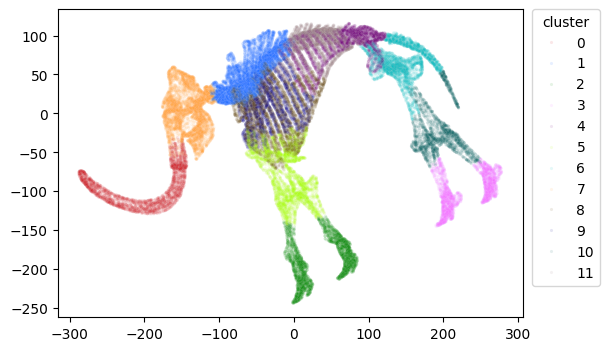

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.96252), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.99220145), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.39018800000000003), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.41937519999999995), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.46485733333333334), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [6]:
import drnb.embed.pipeline as pl

pl.standard_eval(
    method="pca",
    dataset="mammoth",
)